In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from sqlalchemy import extract  

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Create engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

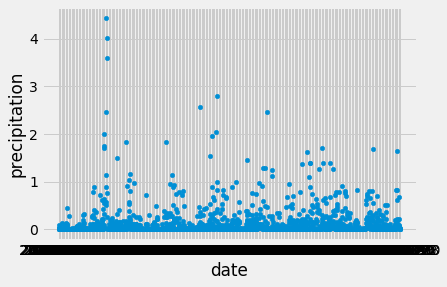

In [10]:
# Precipitation in all years only in the month of June
june_results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)== 6).all()

june_df = pd.DataFrame(june_results, columns=['date','precipitation'])
june_df.set_index(june_df['date'], inplace=True)

june_df.sort_index()

june_df.plot.scatter(x='date', y='precipitation')

In [11]:
june_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


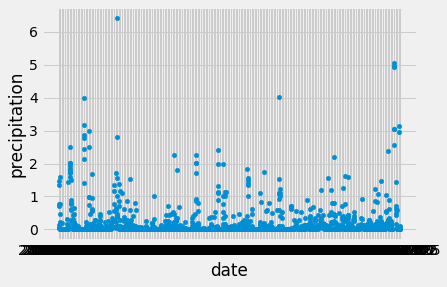

In [12]:
# Precipitation in all years only in the month of December
dec_results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)== 12).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
dec_df = pd.DataFrame(dec_results, columns=['date','precipitation'])
dec_df.set_index(dec_df['date'], inplace=True)
# Sort the dataframe by date
dec_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
dec_df.plot.scatter(x='date',y='precipitation')

In [13]:
dec_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [14]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [15]:
# Temperature min, max, and average for June in all years
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(extract('month', Measurement.date)== 6).group_by(Measurement.station).all()

[('USC00511918', 66.0, 85.0, 74.13939393939394),
 ('USC00513117', 68.0, 83.0, 74.05084745762711),
 ('USC00514830', 67.0, 81.0, 76.00537634408602),
 ('USC00516128', 66.0, 79.0, 71.9372197309417),
 ('USC00517948', 64.0, 82.0, 76.6554054054054),
 ('USC00518838', 67.0, 78.0, 73.39473684210526),
 ('USC00519281', 65.0, 82.0, 73.27118644067797),
 ('USC00519397', 70.0, 84.0, 77.55932203389831),
 ('USC00519523', 71.0, 82.0, 76.66810344827586)]

In [16]:
# Temperature min, max, and average for Decemeber in all years
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(extract('month', Measurement.date)== 12).group_by(Measurement.station).all()

[('USC00511918', 57.0, 81.0, 69.6842105263158),
 ('USC00513117', 63.0, 80.0, 71.06944444444444),
 ('USC00514830', 62.0, 79.0, 73.2247191011236),
 ('USC00516128', 60.0, 83.0, 69.29126213592232),
 ('USC00517948', 64.0, 82.0, 71.8348623853211),
 ('USC00518838', 63.0, 78.0, 72.42105263157895),
 ('USC00519281', 58.0, 79.0, 69.90322580645162),
 ('USC00519397', 56.0, 77.0, 71.10952380952381),
 ('USC00519523', 56.0, 79.0, 72.43333333333334)]

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


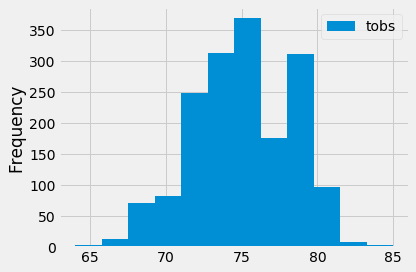

In [17]:
# Statistical data for tobs during the month of June for all years
results = session.query(Measurement.tobs).\
filter(extract('month', Measurement.date)== 6).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


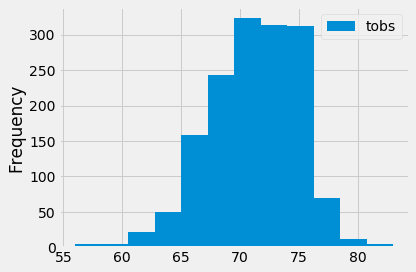

In [18]:
# Statistical data for tobs during the month of June for all years
results = session.query(Measurement.tobs).\
filter(extract('month', Measurement.date)== 12).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
df.describe()

### Statistical Analysis for the months of June and December

The analysis covers only the months of June and December over all years and all stations combined. The month of December seems to be a wetter month than June with an average of .21" precipitation per day compared to .13". The temperatures are relatively the same for both of these months even though they are in opposite seasons. The average temp for June is 74 while December is 71. Now the minimum temperature in December is 56 while in June it was 65, which is understandable as December falls into the seasonal category of winter. The data also shows that the mornings in the month of December start off a bit colder but rise to almost the same temperature maximums as in June. Overall there are no real significant differences in these two months besides the slight increase in the average daily precipitation and the colder mornings in December. 

### Recommendations for Further Analysis

1. Look at months between June and December to see if there are any other differences in the data (precipitation or temperature)
2. Seperate the data by years as opposed to combining all years based on specific months
3. Look for other factors such as wind or cloud coverage that could help explain why the temperature stayed the same or why the precipitation average increased slightly